In [39]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

%matplotlib inline

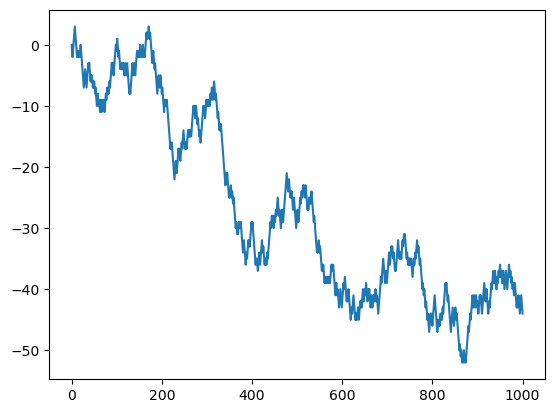

In [40]:
# Pure Python implementation of a random walk

import random

position = 0
walk = [position]
number_of_steps = 1000

for _ in range(number_of_steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk);

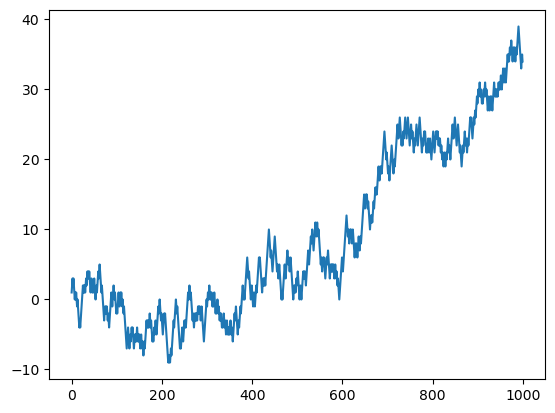

In [41]:
# Implementation using NumPy

def simulate_random_walk(
    number_of_steps: int,
    rng: np.random.Generator=np.random.default_rng()
) -> tuple[npt.NDArray[np.int64], npt.NDArray[np.int64]]:
    """Simulate a 1 dimensional walk of with a given number of steps.
    
    Parameters
    ----------
    number_of_steps: int
        Number of steps to be simulated.
    rng: np.random.Generator, default=np.random.default_rng()
        Random number generator to be used to generate the steps of the walk.

    Returns
    -------
    tuple: [npt.NDArray[np.int64], npt.NDArray[np.int64]]
        2-element tuple containing a ndarray of integers representing the steps in
        at the first index, and a ndarray of integers representing the positions
        at the second index.
    """
    # Create 1d array of 0 and 1
    steps = rng.integers(low=0, high=2, size=number_of_steps)

    # Replace 0 for -1
    steps = np.where(steps== 1, 1, -1)  # steps.sum() is the last position

    # Compute the cumulative sum of the random steps
    walk = steps.cumsum()
    return steps, walk
    

number_of_steps = 1000
# rng = np.random.default_rng(seed=12345)
# steps, walk = simulate_random_walk(number_of_steps, rng)
rng = np.random.default_rng(seed=12345)
steps, walk = simulate_random_walk(number_of_steps)

plt.plot(walk);

In [42]:
print(walk.min())
print(walk.max())

-9
39


In [43]:
# Checking that steps.sum() is the last position
steps.sum() == walk[-1]

True